In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import random
import seaborn as sns
pd.options.display.max_rows=300
pd.set_option('display.max_columns', None)

In [2]:
# df_fluidin = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/06.fluid_resuscitation/00.data/aumc_fluidin.csv")
# df_fluidin.columns = ["stay_id","time","colloid_bolus_v2"]

# df_fea = pd.read_csv("./aumcdb_diuretic_survival.csv")

# df_fb = pd.merge(df_fea,df_fluidin,how="inner",on=["stay_id","time"])
# df_fb["fluidbance_v2"] = df_fb["colloid_bolus_v2"] - df_fb["urineoutput"]

# df_fb["tmp_fluidbance"] = df_fb["fluidbance_v2"]
# df_fb.loc[df_fb["time"]<=0,"tmp_fluidbance"] = 0
# df_fb["cum_fluidbance_v2"] = df_fb.groupby('stay_id')['tmp_fluidbance'].cumsum()
# df_fb = df_fb[["stay_id","time","colloid_bolus_v2","fluidbance_v2","cum_fluidbance_v2"]]
# df_fb.head(1)

In [3]:
df_bt_at = pd.read_csv("df_diuretic_responsitive_match.csv")
#df_bt_at = pd.read_csv("df_diuretic_responsitive.csv")
df_bt_at.head(1)

,stay_id,label_diu_res,groupHPD,mortality_28d,survival_28day,creatinine,urineoutput,baseline_Scr,colloid_bolus,sofa_norenal,Congestive_heart_failure,weight,age,gender,height,respiration_sofa,cardiovascular_sofa,aniongap,pt,sbp,coagulation_sofa,cum_fluidbance,is_diu,baseexcess,hemoglobin,liver_sofa,furosemide_amount,fluidbance,gcs_verbal,gcs,mbp,potassium,spo2,platelet,renal_sofa,gcs_eyes,bicarbonate,sodium,temperature,gcs_motor,po2,ptt,glucose,pco2,chloride,rbc,wbc,ph,sofa,mchc,mcv,hematocrit,first_use_amount,cns_sofa,time,heart_rate,fio2,resp_rate,furosemide_amount_kg,dbp,mch,is_diu_byid,lactate,rdw,calcium,first_use_time,group_creteria,label,df_.tpsa$id
0,91,No diuretic,1,1,1,2.177133,175.0,1.43637,11404.164883,12.2,0,65.0,55,0,165,3.5,4.0,20.57,28.725,108.869565,3.3,11229.16,0,-14.685714,9.726393,1.4,0.0,11229.16,5.0,15.0,66.73913,4.077778,97.500002,NaN,3.6,4.0,11.618182,139.25,36.635714,6.0,98.545455,50.75,126.490909,37.818182,109.333333,3.0,11.133333,7.104545,15.8,35.4486,86.0,0.285758,0.0,0.0,1,116.826087,56.636364,24.108696,0.0,48.173913,30.600486,0,9.666667,13.9,8.92,0,No diuretic,No diuretic,1


  C1


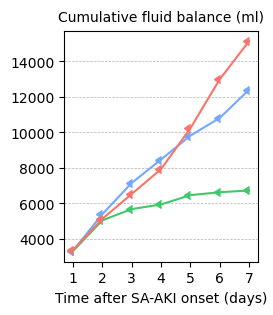

  C1


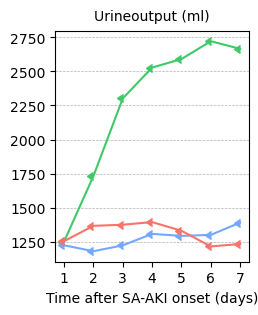

  C2


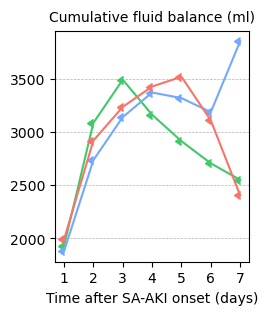

  C2


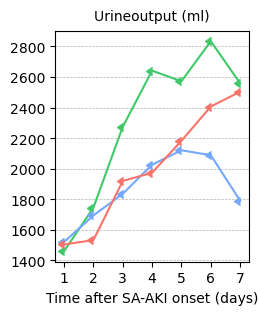

  C3


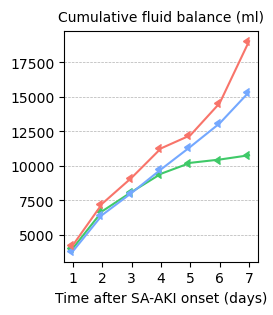

  C3


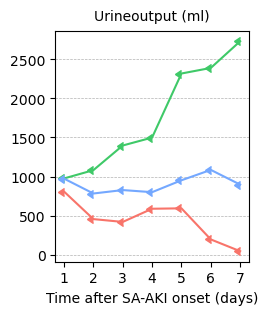

In [6]:
import matplotlib.pyplot as plt
lab_dict = {"furosemide_amount": "Furosemide(mg)", "cum_fluidbance_v2":"Cumulative fluid balance_v2 (ml)", "cum_fluidbance":"Cumulative fluid balance (ml)","urineoutput":"Urineoutput (ml)","colloid_bolus":"Infusion (ml)",'calcium':'calcium','sodium':'sodium', 'potassium':'potassium', 'chloride': 'chloride'}
fea_lst = ["cum_fluidbance","urineoutput"]#, "furosemide_amount","colloid_bolus"]
# fea_lst = [ 'calcium', 'chloride','sodium', 'potassium']

min_dict = {"urineoutput":0,"cum_fluidbance":2000,'free_calcium':1.12,'calcium':8.5,'sodium':135, 'potassium':3.5, 'chloride':95}
max_dict = {"urineoutput":2400,"cum_fluidbance":15000,'free_calcium':1.32,'calcium':10.5,'sodium':145, 'potassium':5, 'chloride':105}

for class_ in [1,2,3]:
    df_fea = pd.read_csv("./aumcdb_diuretic_survival.csv")
#     df_fea =pd.merge(df_fea,df_fb,how="outer",on=["stay_id","time"])
    df_fea = pd.merge(df_fea,df_bt_at[["stay_id","label_diu_res"]],how="inner",on="stay_id")
    df_fea = df_fea[df_fea["groupHPD"]==class_]
    for fea in fea_lst:
        choose_time_lst = [1,2,3,4,5,6,7] 
        df =  df_fea[df_fea["time"].isin(choose_time_lst)] 
        df1 = df[df["label_diu_res"]=="responsive"].groupby('time').agg({fea:"mean"}).reset_index() #[[fea,"time"]]
        df2 = df[df["label_diu_res"]=="Non-responsive"].groupby('time').agg({fea:"mean"}).reset_index() #[[fea,"time"]]
        df3 = df[df["label_diu_res"]=="No diuretic"].groupby('time').agg({fea:"mean"}).reset_index()#[[fea,"time"]]

        fig = plt.figure(figsize=(2.5,3))
        size = 10
        ax=plt.gca()
        ax.tick_params(axis='both', which='both', labelsize=size,
               bottom=True, top=False, labelbottom=True,
               left=True, right=False, labelright=False, labelleft=True)
#         ax.spines['left'].set_visible(False)
#         ax.spines['top'].set_visible(False)
        ax.yaxis.tick_left()
        ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
        plt.plot(df1.time.tolist(),df1[fea].tolist(),marker=8,label="Diuertic-responsive",c="#3fc968")
        plt.plot(df2.time.tolist(),df2[fea].tolist(),marker=8,label="Diuertic-nonresponsive",c="#74a8ff")
        plt.plot(df3.time.tolist(),df3[fea].tolist(),marker=8,label="No diuretic",c="#f8746a")
#        plt.legend(ncol=3,frameon=False)
        plt.xticks([1,2,3,4,5,6,7],[1,2,3,4,5,6,7])
        print("  C" + str(class_))
        tit =lab_dict[fea]
        plt.title(tit,x=0.5,y=1.01,fontsize=size)
        plt.xlabel('Time after SA-AKI onset (days)',fontsize=size)
#        plt.ylim([min_dict[fea],max_dict[fea]])
        
#         plt.axhline(y=min_dict[fea], color='black', linestyle='--', linewidth=1)
#         plt.axhline(y=max_dict[fea], color='black', linestyle='--', linewidth=1)
        tit = "aumcdb_timeseries_C" + str(class_) + "_" +fea + ".pdf"
        plt.savefig(tit, bbox_inches = 'tight')
        plt.show()